<a href="https://colab.research.google.com/github/SumayAlshokili/Artificial-Intelligence-and-Deep-Learning/blob/main/Fruit_Classification_Golden_Apples_and_Red_Apples2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Fruits/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Fruits/Test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple golden')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple red')))

print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple golden')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple red')))


466
453
932
908


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./25,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=12,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1473 images belonging to 2 classes.
Found 367 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 340s 7s/step - accuracy: 1.0000 - loss: 2.6154e-14 - val_accuracy: 0.9782 - val_loss: 0.3833
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 336s 6s/step - accuracy: 1.0000 - loss: 1.9786e-14 - val_accuracy: 0.9782 - val_loss: 0.3861
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 286s 6s/step - accuracy: 1.0000 - loss: 1.7513e-14 - val_accuracy: 0.9782 - val_loss: 0.3861
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - accuracy: 1.0000 - loss: 2.7075e-14 - val_accuracy: 0.9782 - val_loss: 0.3861
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 320s 6s/step - accuracy: 1.0000 - loss: 1.5883e-14 - val_accuracy: 0.9782 - val_loss: 0.3861
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 323s 6s/step - accuracy: 1.0000 - loss: 1.4730e-14 - val_accuracy: 0.9782 - val_loss: 0.3861
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 1.0000 - loss: 2.3301e-14 - val_accuracy: 0.9782 - val_loss: 0.3861
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 299s 6s/step - accuracy: 1.0000 - loss: 1.816

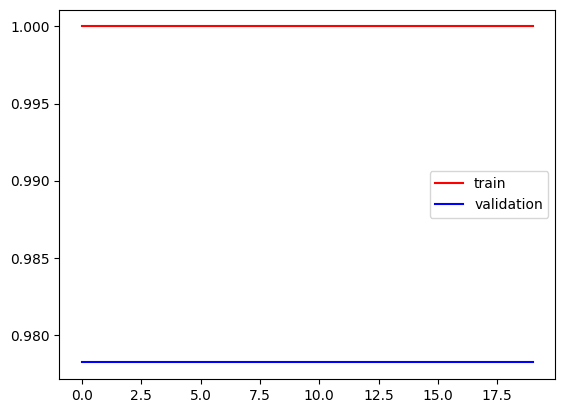

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

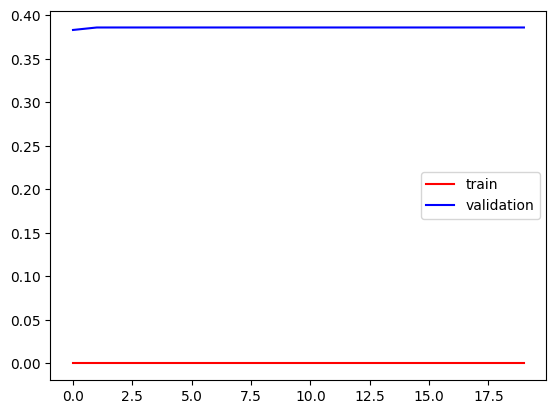

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 919 images belonging to 2 classes.


In [14]:
#predict the test data
predictions = model.predict(test_data)


29/29 ━━━━━━━━━━━━━━━━━━━━ 179s 6s/step


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[231 235]
 [235 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       466
           1       0.48      0.48      0.48       453

    accuracy                           0.49       919
   macro avg       0.49      0.49      0.49       919
weighted avg       0.49      0.49      0.49       919



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 481s 10s/step - accuracy: 0.9118 - loss: 1.0190 - val_accuracy: 0.5232 - val_loss: 41.9748
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 489s 10s/step - accuracy: 0.9986 - loss: 0.0325 - val_accuracy: 0.5068 - val_loss: 540.3394
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 518s 10s/step - accuracy: 0.9981 - loss: 0.0231 - val_accuracy: 0.5068 - val_loss: 545.8329
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 458s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5068 - val_loss: 640.4742
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 521s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5068 - val_loss: 773.5981
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 459s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5068 - val_loss: 933.0851
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 422s 9s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5068 - val_loss: 1119.5409
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 448s 9s/step - accuracy: 1.0000 - los

In [19]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 919 images belonging to 2 classes.


In [20]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[235 231]
 [231 222]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       466
           1       0.49      0.49      0.49       453

    accuracy                           0.50       919
   macro avg       0.50      0.50      0.50       919
weighted avg       0.50      0.50      0.50       919



In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 573s 12s/step - accuracy: 0.5860 - loss: 2.5939 - val_accuracy: 0.4932 - val_loss: 20.9048
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 575s 11s/step - accuracy: 0.9026 - loss: 0.2326 - val_accuracy: 0.4932 - val_loss: 21.0315
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 514s 11s/step - accuracy: 0.9708 - loss: 0.1341 - val_accuracy: 0.4932 - val_loss: 21.3575
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 607s 12s/step - accuracy: 0.9788 - loss: 0.0917 - val_accuracy: 0.4932 - val_loss: 22.7071
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 532s 11s/step - accuracy: 0.9921 - loss: 0.0617 - val_accuracy: 0.4932 - val_loss: 23.1728
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 559s 11s/step - accuracy: 0.9932 - loss: 0.0481 - val_accuracy: 0.4932 - val_loss: 23.7462
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 564s 12s/step - accuracy: 0.9969 - loss: 0.0399 - val_accuracy: 0.4932 - val_loss: 24.3525
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 617s 12s/step - accuracy: 0.9992 - loss: 0.0280 - val_accur

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[235 231]
 [231 222]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       466
           1       0.49      0.49      0.49       453

    accuracy                           0.50       919
   macro avg       0.50      0.50      0.50       919
weighted avg       0.50      0.50      0.50       919

